#목표


#데이터 살펴보기


In [1]:
#프로젝트를 진행함에 필요한 모듈을 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#파이널프로젝트_RAW_210329_210926.xlsx 마운팅 후 DataFrame으로 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/미니프로젝트/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

| 컬럼 | 설명 |
| ---- | ----|
| id | 데이터 처리 내역 |
| customer_id | 고객 고유 번호 |
| course_id | 강의 고유 번호 |
| type    | 고객의 요청사항 종류 |
| state                   | type의 진행상황 |
| course_title            | 강의 제목 |
| category_title          | 강의 카테고리 제목 |
|format         | 강의 과정 분류 종류|
| completed_at            | 강의 결제 완료 시각|
| transaction_amount      | 실 결제 금액|
| coupon_title            | 쿠폰명|
| coupon_discount_amount  | 할인된 금액|
| sale_price              | 판매 금액|
| tax_free_amount    | 면세액 |
| pg                      | 결제대행사 |
| method                  | 결제 방법|
| subcategory_title       | 강의 부 카테고리 제목|
| marketing_start_at      | 해당 강의가 개시된 날 |


____
<유의할 사항>
- 쿠폰 말고도 이벤트같은 다른 조건에 의한 할인도 있다
- 'customer_id'는 중복값이 있으므로 순수 고객수 파악하려면 전처리 필요
- 'tax_free_amount' 데이터는 개인 보안 문제로 제거해주기
- 'course_id'의 결측치는 폐강으로 추측
- 'pg'의 결측치는 주어진 결제대행사 외의 기업을 뜻한다.

#데이터 전처리

>데이터 타입과 결측값 확인하기

1. 데이터 타입 확인

In [31]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105395 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105395 non-null  int64         
 1   customer_id             105395 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105395 non-null  object        
 4   state                   105395 non-null  object        
 5   course_title            105395 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105395 non-null  object        
 8   completed_at            105395 non-null  datetime64[ns]
 9   transaction_amount      105395 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104283

2. 결측치 확인 및 제거

In [28]:
#결측치 확인
df.isna().sum()

id                            0
customer_id                   0
course_id                  5183
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              73578
coupon_discount_amount    73578
sale_price                 1112
tax_free_amount            1112
pg                        15058
method                    13095
subcategory_title         19805
marketing_start_at        17955
dtype: int64

In [32]:
# 카테고리가 누락된 강의들은 폐강된 강의들이므로 해당 row를 제거해준다
df = df.dropna(subset=['category_title'])

>사용하지 않는 컬럼 제거

- id는 단순히 자료 처리 순서이므로 삭제한다.

- tax_free_amount는 보안상의 이유로 삭제한다.

In [33]:
# 'id'와'tax_free_amount' 컬럼 제거
df = df.drop(['id','tax_free_amount'],axis = 'columns')
df.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


>카테고리 컬럼 수정

In [34]:
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14076
업무 생산성,13323
디자인,12009
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250
교육,1031


  위의 표를 보고 처리할 과정을 정리해보았다.
  
  <수정 할 목록>
1. 띄어쓰기 차이로 다른 강의로 구분된 '데이터사이언스'와 '데이터 사이언스'를 합쳐준다.
2. 디자인 카테고리에 서브 카테고리로 속해있는 '일러스트' 카테고리를 '디자인'카테고리에 편입시켜준다.
3. '크리에이티브','교육','지식콘텐츠','비즈니스','파이낸스','관리' 카테고리는 현재 폐강된 카테고리들로 삭제해준다.

In [35]:
# 카테고리 변경
df =df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df =df.replace({'category_title':{'일러스트':'디자인'}})


# 불필요한 카테고리 삭제
df = df[df.category_title != '크리에이티브']
df = df[df.category_title != '교육']
df = df[df.category_title != '지식콘텐츠']
df = df[df.category_title != '비즈니스']
df = df[df.category_title != '파이낸스']
df = df[df.category_title != '관리']

df.category_title.value_counts()

프로그래밍      34430
데이터사이언스    14085
업무 생산성     13323
디자인        12010
영상/3D      10260
마케팅         9857
부동산/금융      5523
투자/재테크      2501
Name: category_title, dtype: int64

> 순수 결제내역 / 순수 환불내역 분류하기

In [36]:
# 결제가 완료된 사람의 데이터
df_pc = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]

# 환불이 완료된 사람의 데이터
df_rc =df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]


# 결제가 완료된 사람과 환불이 완료된 사람의 데이터를 합쳐준다.
df_total = pd.merge(df_pc,df_rc,how='outer')


# 합친 데이터 중에서 'customer_id' , 'course_title','coupon_title' 모두를 만족하는 중복값을 가장 최신값만 남기고 제거해준다.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title','coupon_title'],keep = 'last')
df_total['type'].value_counts()

PAYMENT    49625
REFUND      3645
Name: type, dtype: int64

예시

| 이용자 | 강의명 | 신청상태 | 할인|비고|
|---|---|---|---|--|
|나| A | 환불|x | 수집된 데이터 기간 이전에 구매|
|가| A | 구매| x| 나중에 환불로 구매내역 삭제|
|가| A | 환불 | x| |
|가| A |구매 | o| |
|다| A | 구매| o| |
|나| B |구매 | o|나중에 환불로 구매내역 삭제 |
|나| A |구매 | x| |
|가| C |구매 | o| |
|나| B |환불 | o| |

단, 같은 이용자가 같은 강의를 하나이상 구매하지않는다는 조건이다.

보통 구매한 강의를 환불하지 않고 추가구매를 하진 않으므로 위와 같은 조건을 설정하여 '순수 구매내역'과 '순수 환불 내역'을 분류해도 된다고 판단했다.

In [37]:
# 중복값을 제거한 df_total 데이터 중 type이 payment면 패캠 이용자들의 순 구매 내역,
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]


# type이 refund면 패캠 이용자들의 순 환불 내역이다.
df_refund = df_total['type'] == 'REFUND'
df_refund = df_total[df_refund]


#데이터 분포 확인하기

>할인금액에 따른 분석

- 얼마 할인해줬을 때, 가장 많은 결제를 이끌어냈는지

 1. 할인 받은사람 안받은사람 숫자 비율/ 매출
 2. 할인 타입별 총 수량, 매출
 3. 타입별(그래프 3개) 할인 금액에 따른 전체 결제 횟수, 전체 판매 금액
 4. 구매 금액에 따라 해비유저와 라이트 유저를 분류하고 누가 더 매출에 큰 영향을 주는지



- 같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율



In [38]:
#할인금액 분석에서 사용할 데이터 프레임 생성
df_onlypay = df_pay[['customer_id','sale_price','transaction_amount','coupon_discount_amount']]

In [39]:
df_onlypay.describe()

,customer_id,sale_price,transaction_amount,coupon_discount_amount
count,49625.000000,4.950800e+04,4.962500e+04,2.351900e+04
mean,414064.275950,1.489318e+05,1.383958e+05,5.499557e+04
std,214407.781124,1.225810e+05,8.308029e+05,6.097673e+04
min,46.000000,1.000000e+00,0.000000e+00,4.950000e+02
25%,175425.000000,1.090000e+05,8.000000e+04,2.000000e+04
50%,501801.000000,1.340000e+05,1.165000e+05,3.000000e+04
75%,576464.000000,1.700000e+05,1.530000e+05,8.900000e+04
max,670891.000000,1.590000e+07,1.134000e+08,2.000000e+06


In [55]:
#NaN값 0.0으로 변경
df_onlypay['sale_price'] = df_onlypay['sale_price'].replace(np.NaN,0.0)
df_onlypay

df_onlypay['coupon_discount_amount'] = df_onlypay['coupon_discount_amount'].replace(np.NaN,0.0)

#계산시 오류나지 않게 transaction_amount를 float값으로 변환
df_onlypay = df_onlypay.astype({'transaction_amount':'float'})

In [57]:
# 얼마 할인받는지 계산
df_onlypay['discounted_amount'] = df_onlypay['sale_price'] - df_onlypay['transaction_amount']

# 실구매 가격 대비 할인율 계산
df_onlypay['discount_percent'] = df_onlypay['discounted_amount'] *100 / df_onlypay['sale_price']
df_onlypay['discount_percent'] = df_onlypay['discount_percent'].replace(np.inf,100.0)

In [63]:
#쿠폰 할인외에 이벤트 할인받은 데이터가 있는지 확인

only_coupon = (df_onlypay['coupon_discount_amount'] > 0)
only_coupon.value_counts() 
#쿠폰 할인 받은 사람 : 23519  // 쿠폰 할인 못 받은 사람: 26106

only_teacher = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0) & (df_onlypay['discounted_amount'] < 0)
only_teacher.value_counts() 
#패스트캠퍼스 강사진 전용 이벤트 할인: 124

only_event = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0) & (df_onlypay['discounted_amount'] > 0)
only_event.value_counts() 
#이벤트 할인 받은 사람 : 1279   // 이벤트 할인 못 받은 사람: 48222 


not_discount = (df_onlypay['coupon_discount_amount'] == df_onlypay['discounted_amount']) & (df_onlypay['discounted_amount'] == 0)
not_discount .value_counts()

#할인 못받은 사람: 24703   // 할인 받은사람: 24922 

#할인 받은 사람: 23519 + 1279 + 124= 24922 명 (검산결과 맞음!)

False    24922
True     24703
dtype: int64

>구매 기록과 환불기록 분류하기

In [ ]:
# 할인 타입 컬럼 만들기
df_onlypay['discount_type'] = pd.Series()

# 쿠폰 할인을 안받고 구매한 그룹
df_not_discount = df_onlypay[not_discount]
df_not_discount['discount_type']='X'

# 쿠폰 할인을 받고 구매한 그룹
df_coupon = df_onlypay[only_coupon]
df_coupon['discount_type']='coupon'

# 이벤트 할인을 받고 구매한 그룹
df_event = df_onlypay[only_event]
df_event['discount_type']='event'

# 패스트캠퍼스 강사진 전용 이벤트 할인
df_only_teacher = df_onlypay[only_teacher]
df_only_teacher['discount_type']='only teacher'

#할인 타입 합치기
df_onlypay = pd.concat([df_not_discount,df_coupon,df_event])
df_onlypay

>할인율에 따라 분류

In [65]:
#할인 받은 금액(%)에 따라 분류하는 함수 만들기
def func(x):
  if x == 0:
    return "not discounted"  
  elif  x < 10:
    return "~10%"
  elif x < 20:
    return "~20%"
  elif x < 30:
    return "~30%"
  elif  x < 40:
    return "~40%"
  elif  x < 50:
    return "~50%"
  elif  x < 60:
    return "~60%"
  elif  x < 70:
    return "~70%"
  elif  x < 80:
    return "~80%"
  elif  x < 90:
    return "~90%"
  elif x ==100:
    return "100%"
  else:
    return "teacher only"

df_onlypay['discount_rate'] = (df_onlypay['discount_percent']).apply(func)

In [66]:
df_onlypay['discount_rate'].value_counts()

not discounted    24703
~20%              11093
100%               4683
~10%               3165
~30%               1324
~90%                963
teacher only        936
~40%                896
~80%                762
~70%                481
~60%                300
~50%                195
Name: discount_rate, dtype: int64

#시각화


1. 할인 타입별 결제 횟수, 비율, 총 판매 금액
2. 할인 타입별 매출과 할인율의 관계
3. 타입별(그래프 3개) 할인 금액에 따른 전체 결제 횟수, 전체 판매 금액
4. 구매 금액에 따라 해비유저와 라이트 유저를 분류하고 누가 더 매출에 큰 영향을 주는지


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


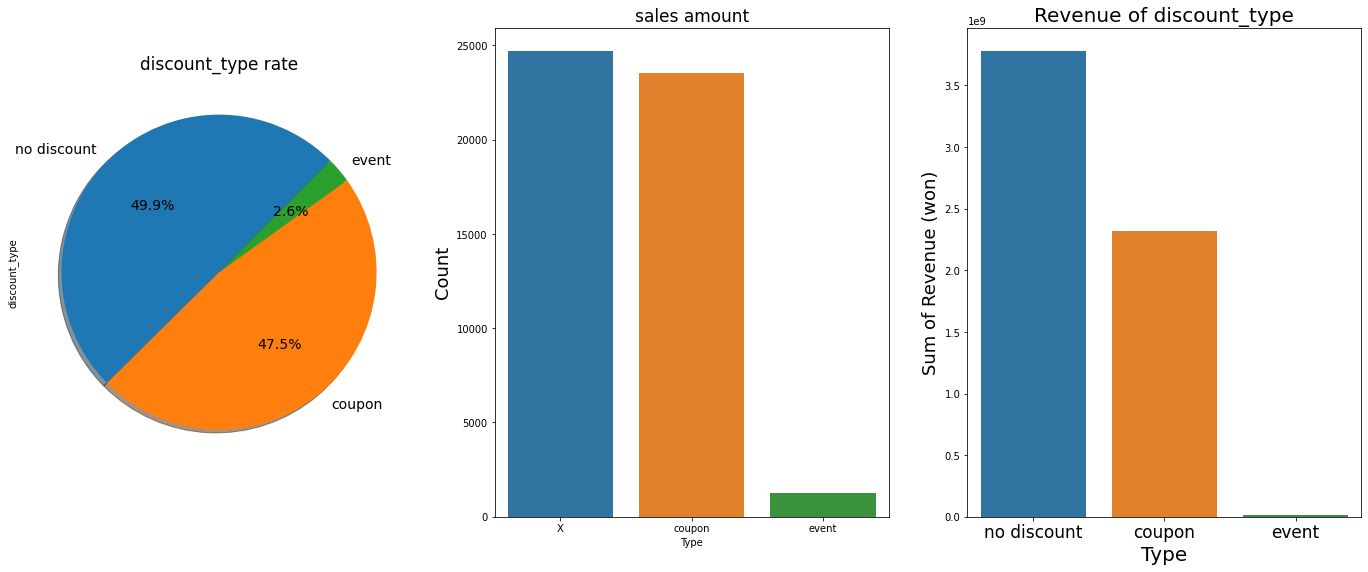

In [67]:
#할인 타입별 결제횟수, 비율, 총 판매 금액
plt.figure(figsize=(24, 9))

#할인 타입 비율
plt.subplot(1,3,1)
labels = ['no discount','coupon','event']
df_onlypay["discount_type"].value_counts().plot.pie( explode=[0,0,0],labels = labels, autopct='%1.1f%%', shadow=True,startangle=45,fontsize = 14)
plt.title('discount_type rate',fontsize = 17)


#할인 타입별 결제 횟수
plt.subplot(1,3,2)
sns.countplot(data=df_onlypay,x='discount_type')
plt.title('sales amount',fontsize =17)
plt.xlabel('Type',fontsize = 10)
plt.ylabel('Count',fontsize = 18)


#할인 타입별 총 판매 금액
revenue_of_discount_type = df_onlypay.groupby('discount_type').transaction_amount.sum()

plt.subplot(1,3,3)
labels = ['no discount','coupon','event']
index = np.arange(len(labels))
sns.barplot(index,revenue_of_discount_type)
plt.title('Revenue of discount_type',fontsize = 20)
plt.xlabel('Type',fontsize = 20)
plt.ylabel('Sum of Revenue (won)',fontsize = 18)
plt.xticks(index,labels,fontsize = 17)

plt.show()

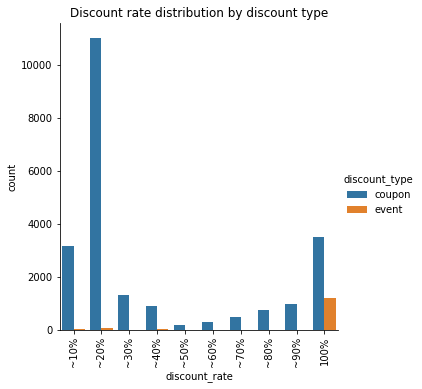

In [68]:
#할인 타입별 할인율 분포

df_onlypay2 = df_onlypay[(df_onlypay['discount_rate']!='not discounted')]

sns.catplot(x='discount_rate', hue='discount_type', kind='count', data=df_onlypay2
            , order=['~10%','~20%','~30%','~40%','~50%','~60%','~70%','~80%','~90%','100%'])
plt.title('Discount rate distribution by discount type')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Revenue by Discount rate & discount type')

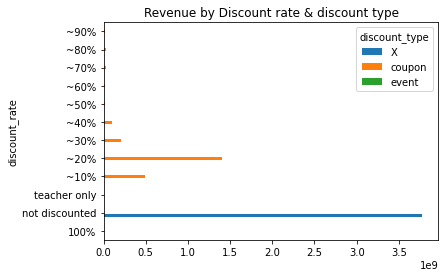

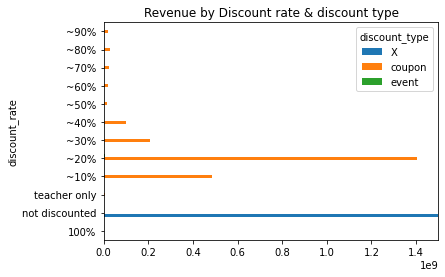

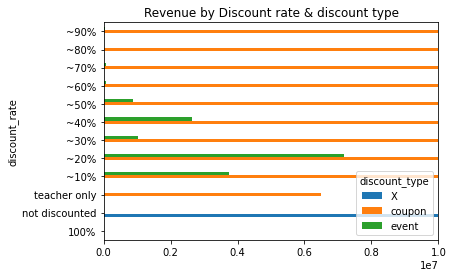

In [69]:
pdf1 =pdf2 = pdf3 = pd.pivot_table(df_onlypay,
                      index='discount_rate',
                      columns='discount_type',
                      values = 'transaction_amount',
                      aggfunc = 'sum')

pdf1 = pdf1.replace(np.NaN,0.0)
pdf1.plot(kind='barh')
plt.title('Revenue by Discount rate & discount type')

pdf2 = pdf1.replace(np.NaN,0.0)
pdf2.plot(kind='barh')
plt.xlim(0,1500000000)
plt.title('Revenue by Discount rate & discount type')

pdf3 = pdf1.replace(np.NaN,0.0)
pdf3.plot(kind='barh')
plt.xlim(0,10000000)
plt.title('Revenue by Discount rate & discount type')

같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율

재결제율

- 웰컴 할인쿠폰을 받은 사람 중 재결제한사람(신규 유입에 쿠폰의 영향?)

- 동일한 결제 수단으로 결제 여부

쿠폰할인 적용 구매자 중 '웰컴쿠폰'사용자와 'WELCOME'쿠폰 사용자가 각각 존재하므로 하나의 그룹으로 통합 시켜준다.

In [ ]:
#웰컴쿠폰 사용자 통합
df_welcome_group = df[(df['coupon_title'].str.contains('웰컴')) | (df['coupon_title'].str.contains('WELCOME'))]